In [1]:
import scipy.io as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('dark_background')

*Seeing how argmax works*

In [2]:
array = np.random.randint(16, size=(4,4))
print(array)

[[15  6  9  0]
 [ 3 11  1  7]
 [ 8  6  9 13]
 [ 1 15  1 14]]


In [3]:
print(np.argmax(array))
# column wise
print(np.argmax(array,axis=0))
# row wise
print(np.argmax(array,axis=1))

0
[0 3 0 3]
[0 1 3 1]


## One Vs All

In [4]:
data = sp.loadmat('ex3data1.mat')

In [5]:
X = data['X']
Y = data['y']

**Let's see the dimensions for X and y** <br>
X has shape of 5000 by 400 which corresponds to 5000 training examples,each with 400 features from its 20 x 20 pixels <br>
y has shape of 5000 by 1 which each training example has a label ranging 1 to 10 (0 = 10)

**We now visualize the data**

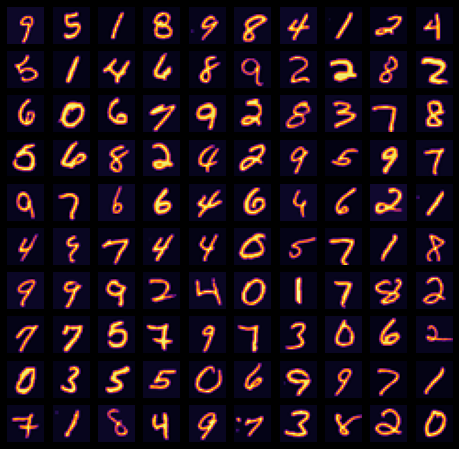

In [6]:
fig, axis = plt.subplots(10, 10, figsize=(8, 8))
for i in range(10):
    for j in range(10):
        axis[i, j].imshow(X[np.random.randint(0, 5001), :].reshape(
            20, 20, order="F"), cmap='inferno')  # reshape back to 20 pixel by 20 pixel
        axis[i, j].axis("off")

In [7]:
def Sigmoid(z):
    z = 1/(1 + np.exp(-z))
    return z

In [8]:
def costFunctionReg(initial_theta, x, y, Lambda, m):
    J = 1/m * ((-y.T @ np.log(Sigmoid(x @ initial_theta))) - ((1 - y).T @ np.log(1 -
                                                                                 Sigmoid(x @ initial_theta)))) + Lambda/(2*m) * np.sum(initial_theta[1:] ** 2)
    gradient_0 = 1/m * np.sum((Sigmoid(x @ initial_theta) - y))
    gradient_1 = 1/m * (x.T @ (Sigmoid(x @ initial_theta) - y)
                        )[1:] + Lambda/m * initial_theta[1:]
    gradient_tot = np.vstack((gradient_0, gradient_1))
    return J[0][0], gradient_tot

In [9]:
# Initialize parameters for testing of cost function
theta_t = np.array([-2, -1, 1, 2]).reshape(4, 1)
x_t = (np.linspace(0.1, 1.5, num=15).reshape(3, 5)).T
x_t = np.hstack((np.ones((5, 1)), x_t))
y_t = np.array([1, 0, 1, 0, 1]).reshape(5, 1)
lambda_t = 3
m = len(y_t)

In [10]:
cost, grad = costFunctionReg(theta_t, x_t, y_t, lambda_t, m)
print('Cost for theta_t is:', cost)
print('Gradient for theta_t is:\n', grad[0:5])

Cost for theta_t is: 2.534819396109744
Gradient for theta_t is:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


In [11]:
def GradientDescent(x, y, theta, alpha, num_iters, Lambda):
    m = len(y)
    J_hist = []
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta, x, y, Lambda, m)
        # update theta by gradient descent
        theta = (theta - alpha*grad)
        J_hist.append(cost)
    return theta, J_hist

In [12]:
def onevsall(x, y, num_labels, Lambda):
    m = data['X'].shape[0]
    n = data['X'].shape[1]
    all_theta = []
    all_j = []
    x = np.hstack((np.ones((m, 1)), x))
    initial_theta = np.zeros((n+1, 1))
    
    for i in range(1, num_labels+1):
        theta, J_hist = GradientDescent(x, np.where(
            y == i, 1, 0), initial_theta, 1, 300, Lambda)
        all_theta.extend(theta)
        all_j.extend(J_hist)
    return np.array(all_theta).reshape(num_labels, n+1), all_j

In [13]:
all_theta, all_J = onevsall(X, Y, 10, 0.1)

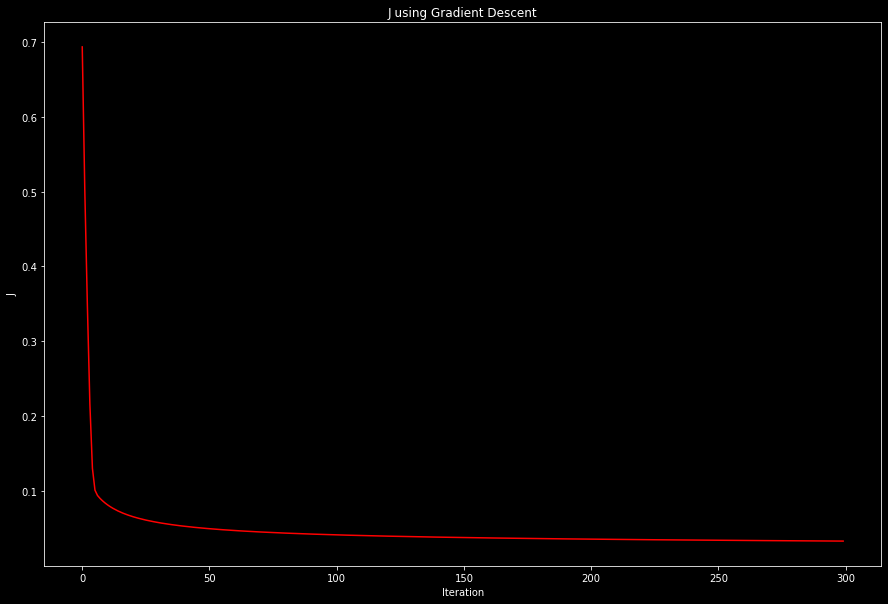

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(all_J[0:300], c='Red')
plt.xlabel('Iteration')
plt.ylabel('J')
plt.grid(False)
plt.title('J using Gradient Descent')
plt.show()

In [15]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label

    return a vector of prediction
    """
    m = X.shape[0]
    X = np.hstack((np.ones((m, 1)), X))

    predictions = X @ all_theta.T
    return predictions, np.argmax(predictions, axis=1)+1


pre, pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:", sum(pred[:, np.newaxis] == Y)[0]/5000*100, "%")

Training Set Accuracy: 91.46 %


*Logistic regression cannot form more complex hypotheses as it is only a linear classifier. Neural network will be able to represent complex models that form non-linear hypotheses*

## Neural Networks

In [16]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

**Visualize the data**

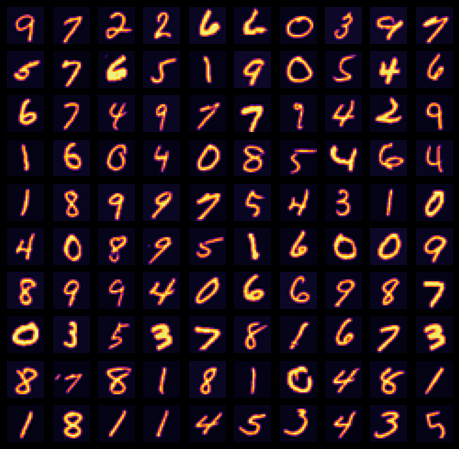

In [17]:
fig, axis = plt.subplots(10, 10, figsize=(8, 8))
for i in range(10):
    for j in range(10):
        axis[i, j].imshow(X[np.random.randint(0, 5001), :].reshape(
            20, 20, order="F"), cmap='inferno')  # reshape back to 20 pixel by 20 pixel
        axis[i, j].axis("off")

In [18]:
weights = sp.loadmat('ex3weights.mat')

In [19]:
w_theta1 = weights['Theta1']
w_theta2 = weights['Theta2']

In [20]:
train_ex = len(Y)

In [21]:
X = np.hstack((np.ones((train_ex,1)),data['X']))

In [22]:
def neuralnetworks(theta1, theta2, x):
    z_2 = theta1 @ x.T
    a_2 = Sigmoid(z_2)
    a_2 = np.vstack((np.ones((1,a_2.shape[1])),a_2))
    z_3 = theta2 @ a_2
    a_3 = Sigmoid(z_3)
    return np.argmax(a_3.T,axis=1) + 1

In [23]:
pred = neuralnetworks(w_theta1, w_theta2, X)

In [24]:
print('The training accuracy is:', sum(pred[:,np.newaxis] == Y)[0]/5000 * 100, '%')

The training accuracy is: 97.52 %
